<a href="https://colab.research.google.com/github/kayleepho/MATH-5750-Project-3/blob/main/project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Math 5750/6880: Mathematics of Data Science \
Project 3

# 1. Fashion-MNIST image classification using sklearn
In this exercise, you will build a
classifier for the Fashion-MNIST image dataset using the sklearn MLPClassifier.\\
- Use the provided code to import and preprocess the Fashion-MNIST image dataset. \\
- Build a dense neural network
using MLPClassifier. \\
- Start with a simple model architecture and train your model.\\
- Then experiment with your model/training method by changing:\\
• the number of hidden layers and neurons\\
• the activation functions\\
• optimization method and the learning rate\\
• regularization or early stopping settings.\\
- Observe how each change affects convergence speed and accuracy.

In [1]:
from tensorflow.keras.datasets import fashion_mnist
from sklearn.preprocessing import StandardScaler

# Load Fashion-MNIST
# Classes (0-9): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(len(X_train), -1)
X_test  = X_test.reshape(len(X_test), -1)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Build a dense neural network using MLPClassifier.
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42)

# Train the model
mlp.fit(X_train, y_train)

# Make predictions
y_pred = mlp.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8836


In [3]:
# Changing the number of hidden layers and neurons
mlp1 = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)
mlp1.fit(X_train, y_train)
y_pred1 = mlp1.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred1)
print(f"Accuracy: {accuracy1}")

Accuracy: 0.8802


In [4]:
# Changing the activation functions
mlp2 = MLPClassifier(hidden_layer_sizes=(100,), activation='tanh', solver='adam', random_state=42)
mlp2.fit(X_train, y_train)
y_pred2 = mlp2.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy2}")

Accuracy: 0.8741


In [5]:
# Changing optimization method and the learning rate
mlp3 = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='sgd', learning_rate_init=0.01, random_state=42)
mlp3.fit(X_train, y_train)
y_pred3 = mlp3.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred3)
print(f"Accuracy: {accuracy3}")

Accuracy: 0.8801


In [6]:
# Changing regularization or early stopping settings
mlp4 = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', early_stopping=True, random_state=42)
mlp4.fit(X_train, y_train)
y_pred4 = mlp4.predict(X_test)
accuracy4 = accuracy_score(y_test, y_pred4)
print(f"Accuracy: {accuracy4}")

Accuracy: 0.8832


In [7]:
import time
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Load and preprocess data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Flatten images: 28x28 -> 784
X_train = X_train.reshape(X_train.shape[0], -1)
X_test  = X_test.reshape(X_test.shape[0], -1)

# Check shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# Define model configurations
configs = [
    ("Baseline", dict(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42)),
    ("Deeper network", dict(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)),
    ("Tanh activation", dict(hidden_layer_sizes=(100,), activation='tanh', solver='adam', random_state=42)),
    ("SGD optimizer", dict(hidden_layer_sizes=(100,), activation='relu', solver='sgd', learning_rate_init=0.01, random_state=42)),
    ("Regularized + EarlyStop", dict(hidden_layer_sizes=(100,), activation='relu', solver='adam', early_stopping=True, random_state=42))
]

# Train models and record results
results = []

for name, params in configs:
    print(f"\nTraining model: {name}")
    start_time = time.time()

    mlp = MLPClassifier(**params)
    mlp.fit(X_train, y_train)  # Should now work without 4D error

    train_time = time.time() - start_time
    accuracy = accuracy_score(y_test, mlp.predict(X_test))

    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Training Time (s)": train_time,
        "Iterations": mlp.n_iter_
    })

    print(f"Accuracy: {accuracy:.4f}, Training Time: {train_time:.2f}s, Iterations: {mlp.n_iter_}")

df_results = pd.DataFrame(results)
print("\nSummary of experiments:")
print(df_results)


X_train shape: (60000, 784)
X_test shape: (10000, 784)

Training model: Baseline
Accuracy: 0.8836, Training Time: 299.14s, Iterations: 124

Training model: Deeper network
Accuracy: 0.8802, Training Time: 259.40s, Iterations: 93

Training model: Tanh activation
Accuracy: 0.8741, Training Time: 305.58s, Iterations: 104

Training model: SGD optimizer
Accuracy: 0.8801, Training Time: 429.58s, Iterations: 184

Training model: Regularized + EarlyStop
Accuracy: 0.8832, Training Time: 67.75s, Iterations: 30

Summary of experiments:
                     Model  Accuracy  Training Time (s)  Iterations
0                 Baseline    0.8836         299.142319         124
1           Deeper network    0.8802         259.403377          93
2          Tanh activation    0.8741         305.576291         104
3            SGD optimizer    0.8801         429.580170         184
4  Regularized + EarlyStop    0.8832          67.750554          30



Training model: Baseline
Accuracy: 0.8836, Training Time: 309.67s, Iterations: 124

Training model: Deeper network
Accuracy: 0.8802, Training Time: 261.61s, Iterations: 93

Training model: Tanh activation
Accuracy: 0.8741, Training Time: 305.58s, Iterations: 104

Training model: SGD optimizer
Accuracy: 0.8801, Training Time: 414.29s, Iterations: 184

Training model: Regularized + EarlyStop
Accuracy: 0.8832, Training Time: 69.35s, Iterations: 30


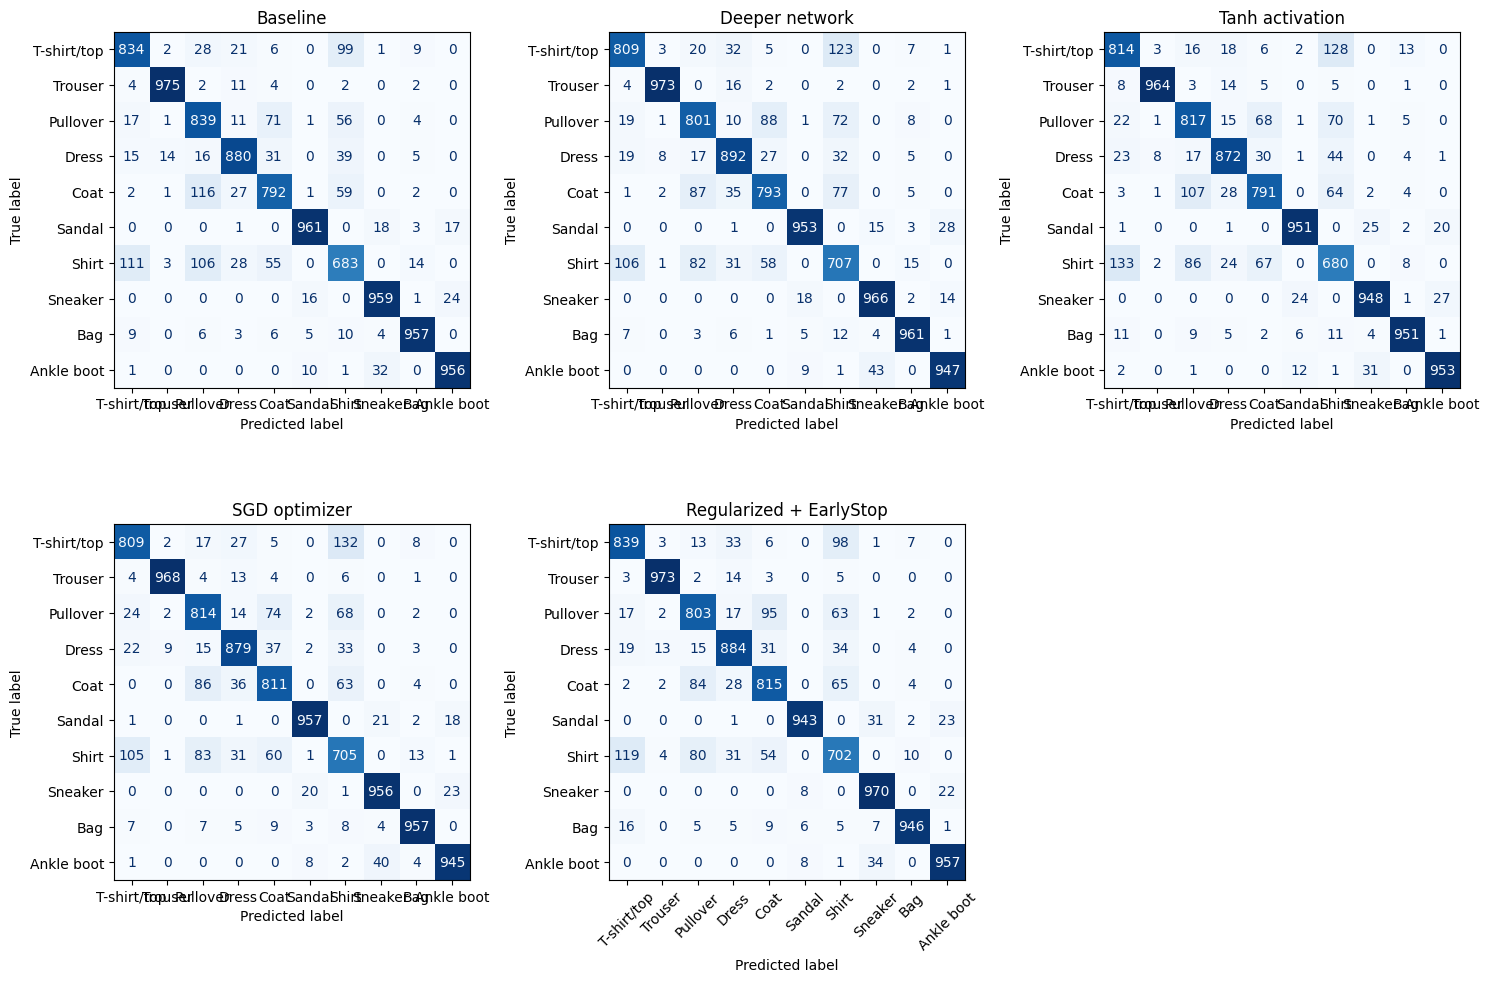

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Class labels for Fashion-MNIST
class_labels = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Re-run configurations to store trained models for confusion matrices
trained_models = {}

for name, params in configs:
    print(f"\nTraining model: {name}")
    start_time = time.time()

    mlp = MLPClassifier(**params)
    mlp.fit(X_train, y_train)

    trained_models[name] = mlp  # Save model
    train_time = time.time() - start_time
    accuracy = accuracy_score(y_test, mlp.predict(X_test))

    print(f"Accuracy: {accuracy:.4f}, Training Time: {train_time:.2f}s, Iterations: {mlp.n_iter_}")

# Plot confusion matrices
plt.figure(figsize=(15, 10))
for i, (name, model) in enumerate(trained_models.items(), 1):
    plt.subplot(2, 3, i)
    disp = ConfusionMatrixDisplay.from_estimator(
        model, X_test, y_test,
        display_labels=class_labels,
        cmap='Blues',
        colorbar=False,
        ax=plt.gca()
    )
    plt.title(name)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

# 3. Fashion-MNIST image classification  using pytorch
In this exercise, you will repeat Exercise 1 using PyTorch.
- Use the provided code to import and preprocess the Fashion-MNIST image dataset.
- Again, start with a simple model architecture and train your model.
- As above, experiment with the model/training method.
- With pytorch, there are many more options, so read about them and experiment!
- Try to further improve your model by using convolutional neural network (CNN) layers and MaxPool2d layers.
- For a challenge, use transfer learning to import a pretrained model and fine
tune it on the Fashion-MNIST image dataset.

In [7]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
import torch
from torch.utils.data import TensorDataset, DataLoader

# Load Fashion-MNIST
# Classes (0-9): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# scale to [0,1], add channel dimension -> (N, 1, 28, 28)
X_train = (X_train.astype("float32") / 255.0)[:, None, :, :]
X_test  = (X_test.astype("float32")  / 255.0)[:,  None, :, :]

y_train = y_train.astype(np.int64)
y_test  = y_test.astype(np.int64)

# train/val split: last 10k of train as validation
X_tr, X_val = X_train[:50000], X_train[50000:]
y_tr, y_val = y_train[:50000], y_train[50000:]

# wrap in PyTorch TensorDatasets and DataLoaders
train_ds = TensorDataset(torch.from_numpy(X_tr),  torch.from_numpy(y_tr))
val_ds   = TensorDataset(torch.from_numpy(X_val), torch.from_numpy(y_val))
test_ds  = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))

train_loader = DataLoader(train_ds, batch_size=128, shuffle=True)
val_loader   = DataLoader(val_ds,   batch_size=256, shuffle=False)
test_loader  = DataLoader(test_ds,  batch_size=256, shuffle=False)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [8]:
import torch.nn as nn
import torch.optim as optim

# In colab, you should ``change runtime type'' to GPU.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cpu


In [12]:
# Start with a simple model architecture
class SimpleCNN(nn.Module):
    def __init__(self, activation='relu'):
        super().__init__()
        act_fn = nn.ReLU() if activation == 'relu' else nn.Tanh()
        self.net = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            act_fn,
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            act_fn,
            nn.MaxPool2d(2, 2),
            nn.Flatten(),
            nn.Linear(64 * 7 * 7, 128),
            act_fn,
            nn.Linear(128, 10)
        )

    def forward(self, x):
        return self.net(x)

In [13]:
# Train the model
def train_model(model, optimizer, train_loader, val_loader, n_epochs=5):
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    history = []

    for epoch in range(n_epochs):
        model.train()
        total_loss = 0
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            pred = model(xb)
            loss = criterion(pred, yb)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        # Validation accuracy
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for xb, yb in val_loader:
                xb, yb = xb.to(device), yb.to(device)
                pred = model(xb)
                correct += (pred.argmax(1) == yb).sum().item()
                total += yb.size(0)

        val_acc = correct / total
        print(f"Epoch {epoch+1}: loss={total_loss/len(train_loader):.4f}, val_acc={val_acc:.4f}")
        history.append(val_acc)
    return history

In [14]:
def test_accuracy(model, test_loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for xb, yb in test_loader:
            xb, yb = xb.to(device), yb.to(device)
            pred = model(xb)
            correct += (pred.argmax(1) == yb).sum().item()
            total += yb.size(0)
    return correct / total

In [15]:
# Experiment with the model/training method
configs = [
    ("Baseline (ReLU + Adam)", SimpleCNN('relu'), optim.Adam),
    ("Tanh activation", SimpleCNN('tanh'), optim.Adam),
    ("SGD optimizer", SimpleCNN('relu'), optim.SGD),
]

results = []

for name, model, opt_class in configs:
    print(f"\nTraining: {name}")
    optimizer = opt_class(model.parameters(), lr=0.001 if opt_class == optim.Adam else 0.01)
    train_model(model, optimizer, train_loader, val_loader, n_epochs=5)
    acc = test_accuracy(model, test_loader)
    print(f"Test accuracy for {name}: {acc:.4f}")
    results.append((name, acc))


Training: Baseline (ReLU + Adam)
Epoch 1: loss=0.5503, val_acc=0.8626
Epoch 2: loss=0.3364, val_acc=0.8850
Epoch 3: loss=0.2894, val_acc=0.8944
Epoch 4: loss=0.2557, val_acc=0.8954
Epoch 5: loss=0.2382, val_acc=0.9069
Test accuracy for Baseline (ReLU + Adam): 0.8982

Training: Tanh activation
Epoch 1: loss=0.4861, val_acc=0.8748
Epoch 2: loss=0.3070, val_acc=0.8901
Epoch 3: loss=0.2642, val_acc=0.8942
Epoch 4: loss=0.2334, val_acc=0.9032
Epoch 5: loss=0.2099, val_acc=0.9136
Test accuracy for Tanh activation: 0.9042

Training: SGD optimizer
Epoch 1: loss=1.3826, val_acc=0.6639
Epoch 2: loss=0.7344, val_acc=0.7496
Epoch 3: loss=0.6515, val_acc=0.7416
Epoch 4: loss=0.6019, val_acc=0.7817
Epoch 5: loss=0.5670, val_acc=0.8022
Test accuracy for SGD optimizer: 0.7962


In [31]:
import pandas as pd
df_results = pd.DataFrame(results, columns=["Model", "Test Accuracy"])
print("\nSummary of experiments:")
print(df_results)


Summary of experiments:
                    Model  Test Accuracy
0  Baseline (ReLU + Adam)         0.8982
1         Tanh activation         0.9042
2           SGD optimizer         0.7962


In [36]:
# improve your model by using convolutional neural network (CNN) layers and MaxPool2d layers
import torch.nn as nn
import torch.nn.functional as F

class ImprovedCNN(nn.Module):
  def __init__(self, activation='relu'):
    super().__init__()
    act_fn = nn.ReLU() if activation == 'relu' else nn.Tanh()

    self.net = nn.Sequential(
        nn.Conv2d(1, 32, kernel_size=3, padding=1),
        act_fn,
        nn.MaxPool2d(2, 2),

        nn.Conv2d(32, 64, kernel_size=3, padding=1),
        act_fn,
        nn.MaxPool2d(2, 2),

        nn.Conv2d(64, 128, kernel_size=3, padding=1),
        act_fn,
        nn.MaxPool2d(2, 2),

        nn.Flatten(),

        nn.Linear(128 * 3 * 3, 128),
        act_fn,
        nn.Linear(128, 10)
    )

  def forward(self, x):
    return self.net(x)

In [41]:
# This works with ImprovedCNN:
model = ImprovedCNN('relu').to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
train_model(model, optimizer, train_loader, val_loader, n_epochs=5)
acc = test_accuracy(model, test_loader)
print(f"Improved CNN test accuracy: {acc:.4f}")


RuntimeError: output with shape [1, 224, 224] doesn't match the broadcast shape [3, 224, 224]

In [38]:
# use transfer learning to import a pretrained model and fine tune it on the Fashion-MNIST image dataset
from torchvision import datasets, transforms, models

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.2])
])

train_ds = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_ds, batch_size=128, shuffle=True)

test_ds = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_ds, batch_size=128, shuffle=False)


In [39]:
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)

for param in model.parameters():
    param.requires_grad = False

for param in model.fc.parameters():
    param.requires_grad = True

model = model.to(device)

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [40]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_model(model, optimizer, train_loader, test_loader, n_epochs=5)

RuntimeError: output with shape [1, 224, 224] doesn't match the broadcast shape [3, 224, 224]

In [ ]:
def train_model